## Tensor ve Parameter

In [1]:
import torch
from torch import nn
from torch import Tensor


In [2]:
class MyLiner(nn.Module):
    def __init__(self, in_features, out_features, bias=True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        
        self.weights = nn.Parameter(
                torch.randn(in_features, out_features))
        
        self.bias = nn.Parameter(torch.randn(out_features))

    def forward(self, x : Tensor):
        return x @ self.weights + self.bias

In [3]:
x = torch.randn(5, 7)

In [4]:
x

tensor([[-0.1290,  0.9276,  1.4571, -0.7998, -0.2309,  1.4767, -0.7163],
        [-0.4124,  2.4545, -0.0843,  1.9181,  0.4909,  0.1743,  0.8474],
        [-0.8565,  0.3048, -1.0143, -0.8152, -0.4915, -0.2336,  1.5950],
        [ 1.0215,  0.6244,  0.9713, -0.0904,  0.8092, -0.1705, -0.4818],
        [-1.5510,  0.6296,  1.7044, -0.3278,  0.2561, -0.0385,  0.5673]])

In [6]:
layer = MyLiner(7, 12)
layer(x).shape

torch.Size([5, 12])

In [7]:
for value in layer.parameters():
    print(value)

Parameter containing:
tensor([[ 0.5629,  0.8195, -1.4077,  0.8770,  0.2219,  0.8223,  1.8810, -0.1525,
         -0.9357,  0.7541,  0.7736, -2.8399],
        [-0.8456,  0.1043, -0.5932,  0.3054,  0.2600, -0.3360, -0.7937,  1.5192,
          0.1650, -0.5944,  1.9097,  0.6564],
        [ 0.4087,  0.5548, -0.9089, -0.2926,  0.3594, -0.1939,  2.2032, -1.0533,
         -0.7218, -1.7363, -1.3961, -0.7586],
        [ 0.2267,  0.8794, -1.2312,  0.1698,  0.3916,  0.2688,  0.4599,  2.1481,
          0.1497, -0.3310,  0.4746,  0.3253],
        [-0.1326,  0.9534, -0.6116,  1.2717, -1.6121, -0.7353,  2.1038, -1.4438,
          0.0502,  1.1931, -0.7239,  0.7101],
        [-2.0860,  0.2396,  2.0077, -1.2387, -1.3745, -1.0013,  1.6849, -1.6709,
         -0.8155, -1.5970,  0.2834, -2.0063],
        [ 0.6734,  0.8970, -0.6373,  2.0053, -0.7883, -0.4614,  1.6959, -0.8284,
          1.9163, -0.7048,  0.2177,  0.7888]], requires_grad=True)
Parameter containing:
tensor([ 0.4265, -0.1408, -1.1188, -1.0250,  0

In [10]:
class MyLiner(nn.Module):
    def __init__(self, in_features, out_features, bias=True):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        
        self.weights = Tensor(
                torch.randn(in_features, out_features))
        
        self.bias = Tensor(torch.randn(out_features))

    def forward(self, x : Tensor):
        return x @ self.weights + self.bias


layer = MyLiner(7, 12)
layer(x).shape

torch.Size([5, 12])

In [11]:
for value in layer.parameters():
    print(value)

## AutoGrad for Linear Regression
https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817

$$ y=2x+1 $$

In [12]:
import numpy as np
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [13]:
x_train

array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [14]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [15]:
import torch
from torch.autograd import Variable
class LinearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [16]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = LinearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [17]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [18]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(204.0788, grad_fn=<MseLossBackward>)
epoch 0, loss 204.07884216308594
tensor(16.9175, grad_fn=<MseLossBackward>)
epoch 1, loss 16.91753387451172
tensor(1.6483, grad_fn=<MseLossBackward>)
epoch 2, loss 1.6483410596847534
tensor(0.3999, grad_fn=<MseLossBackward>)
epoch 3, loss 0.3998833894729614
tensor(0.2951, grad_fn=<MseLossBackward>)
epoch 4, loss 0.29508668184280396
tensor(0.2836, grad_fn=<MseLossBackward>)
epoch 5, loss 0.2836077809333801
tensor(0.2798, grad_fn=<MseLossBackward>)
epoch 6, loss 0.2797733545303345
tensor(0.2766, grad_fn=<MseLossBackward>)
epoch 7, loss 0.27659451961517334
tensor(0.2735, grad_fn=<MseLossBackward>)
epoch 8, loss 0.27350136637687683
tensor(0.2704, grad_fn=<MseLossBackward>)
epoch 9, loss 0.27044668793678284
tensor(0.2674, grad_fn=<MseLossBackward>)
epoch 10, loss 0.26742690801620483
tensor(0.2644, grad_fn=<MseLossBackward>)
epoch 11, loss 0.2644406259059906
tensor(0.2615, grad_fn=<MseLossBackward>)
epoch 12, loss 0.2614874839782715
tensor(0.2586, 

In [20]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)


[[ 0.41637066]
 [ 2.5004187 ]
 [ 4.584467  ]
 [ 6.6685147 ]
 [ 8.7525625 ]
 [10.836611  ]
 [12.920658  ]
 [15.004706  ]
 [17.088755  ]
 [19.172802  ]
 [21.256851  ]]


In [21]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [22]:
for p in model.parameters():
    if p.requires_grad:
         print(p.name, p.data)

None tensor([[2.0840]])
None tensor([0.4164])


## Logistic Regression

In [23]:
import torch
import torchvision
import torch.nn as nn
from torchvision import datasets, models, transforms
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## print out the pytorch version used (1.31 at the time of this tutorial)
print(torch.__version__)

1.9.0+cu102


In [24]:
## configuration to detect cuda or cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print (device)

cpu


In [25]:
DATA_PATH = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"

In [26]:
import urllib
import os
import shutil
from zipfile import ZipFile


urllib.request .urlretrieve(DATA_PATH, "hymenoptera_data.zip")



with ZipFile("hymenoptera_data.zip", 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

os.rename("hymenoptera_data", "data")


In [27]:
## configure root folder on your gdrive
data_dir = "./data"

## custom transformer to flatten the image tensors
class ReshapeTransform:
    def __init__(self, new_size):
        self.new_size = new_size

    def __call__(self, img):
        result = torch.reshape(img, self.new_size)
        return result

## transformations used to standardize and normalize the datasets
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,)) # flattens the data
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        ReshapeTransform((-1,)) # flattens the data
    ]),
}

## load the correspoding folders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}

## load the entire dataset; we are not using minibatches here
train_dataset = torch.utils.data.DataLoader(image_datasets['train'],
                                            batch_size=len(image_datasets['train']),
                                            shuffle=True)
test_dataset = torch.utils.data.DataLoader(image_datasets['val'],
                                           batch_size=len(image_datasets['val']),
                                           shuffle=True)

Dimension of image: torch.Size([244, 150528]) 
 Dimension of labels torch.Size([244])


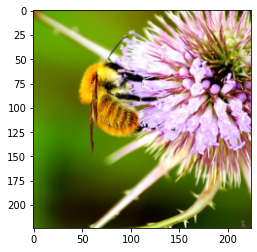

In [28]:
## load the entire dataset
x, y = next(iter(train_dataset))

## print one example
dim = x.shape[1]
print("Dimension of image:", x.shape, "\n", 
      "Dimension of labels", y.shape)

plt.imshow(x[160].reshape(1, 3, 224, 224).squeeze().T.numpy())

In [29]:
class LR(nn.Module):
    def __init__(self, dim, lr=torch.scalar_tensor(0.01)):
        super(LR, self).__init__()
        # intialize parameters
        self.w = torch.zeros(dim, 1, dtype=torch.float).to(device)
        self.b = torch.scalar_tensor(0).to(device)
        self.grads = {"dw": torch.zeros(dim, 1, dtype=torch.float).to(device),
                      "db": torch.scalar_tensor(0).to(device)}
        self.lr = lr.to(device)

    def forward(self, x):
        ## compute forward
        z = torch.mm(self.w.T, x) + self.b
        a = self.sigmoid(z)
        return a

    def sigmoid(self, z):
        return 1/(1 + torch.exp(-z))

    def backward(self, x, yhat, y):
        ## compute backward
        self.grads["dw"] = (1/x.shape[1]) * torch.mm(x, (yhat - y).T)
        self.grads["db"] = (1/x.shape[1]) * torch.sum(yhat - y)
    
    def optimize(self):
        ## optimization step
        self.w = self.w - self.lr * self.grads["dw"]
        self.b = self.b - self.lr * self.grads["db"]

## utility functions
def loss(yhat, y):
    m = y.size()[1]
    return -(1/m)* torch.sum(y*torch.log(yhat) + (1 - y)* torch.log(1-yhat))

def predict(yhat, y):
    y_prediction = torch.zeros(1, y.size()[1])
    for i in range(yhat.size()[1]):
        if yhat[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1
    return 100 - torch.mean(torch.abs(y_prediction - y)) * 100

In [32]:
## model pretesting
x, y = next(iter(train_dataset))

## flatten/transform the data
x_flatten = x.T
y = y.unsqueeze(0) 

## num_px is the dimension of the images
dim = x_flatten.shape[0]

## model instance
model = LR(dim)
model.to(device)
yhat = model.forward(x_flatten.to(device))
yhat = yhat.data.cpu()

## calculate loss
cost = loss(yhat, y)
prediction = predict(yhat, y)
print("Cost: ", cost)
print("Accuracy: ", prediction)

## backpropagate
model.backward(x_flatten.to(device), yhat.to(device), y.to(device))
model.optimize()

Cost:  tensor(0.6931)
Accuracy:  tensor(50.4098)


In [33]:
## hyperparams
costs = []
dim = x_flatten.shape[0]
learning_rate = torch.scalar_tensor(0.0001).to(device)
num_iterations = 100
lrmodel = LR(dim, learning_rate)
lrmodel.to(device)

## transform the data
def transform_data(x, y):
    x_flatten = x.T
    y = y.unsqueeze(0) 
    return x_flatten, y 

## training the model
for i in range(num_iterations):
    x, y = next(iter(train_dataset))
    test_x, test_y = next(iter(test_dataset))
    x, y = transform_data(x, y)
    test_x, test_y = transform_data(test_x, test_y)

    # forward
    yhat = lrmodel.forward(x.to(device))
    cost = loss(yhat.data.cpu(), y)
    train_pred = predict(yhat, y)
        
    # backward
    lrmodel.backward(x.to(device), 
                    yhat.to(device), 
                    y.to(device))
    lrmodel.optimize()
    ## test
    yhat_test = lrmodel.forward(test_x.to(device))
    test_pred = predict(yhat_test, test_y)

    if i % 10 == 0:
        costs.append(cost)

    if i % 10 == 0:
        print("Cost after iteration {}: {} | Train Acc: {} | Test Acc: {}".format(i, 
                                                                                    cost, 
                                                                                    train_pred,
                                                                                    test_pred))


Cost after iteration 0: 0.6931472420692444 | Train Acc: 50.40983581542969 | Test Acc: 45.75163269042969
Cost after iteration 10: 0.6691471338272095 | Train Acc: 64.3442611694336 | Test Acc: 54.24836730957031
Cost after iteration 20: 0.6513182520866394 | Train Acc: 68.44261932373047 | Test Acc: 54.24836730957031
Cost after iteration 30: 0.6367825269699097 | Train Acc: 68.03278350830078 | Test Acc: 54.24836730957031
Cost after iteration 40: 0.6245337128639221 | Train Acc: 69.67213439941406 | Test Acc: 54.90196228027344
Cost after iteration 50: 0.6139225363731384 | Train Acc: 70.90164184570312 | Test Acc: 56.20914840698242
Cost after iteration 60: 0.6045236587524414 | Train Acc: 72.54098510742188 | Test Acc: 56.86274337768555
Cost after iteration 70: 0.5960512161254883 | Train Acc: 74.18032836914062 | Test Acc: 57.51633834838867
Cost after iteration 80: 0.5883085131645203 | Train Acc: 73.77049255371094 | Test Acc: 57.51633834838867
Cost after iteration 90: 0.5811557769775391 | Train Acc: 

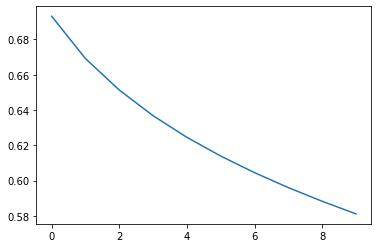

In [34]:

## the trend in the context of loss
plt.plot(costs)
plt.show()